# Part 2: Generalized Linear Models
<b>Author</b>: Sterling Cutler
<br>
<b>Date</b>: March 21, 2018

Let's load and preview our auto bodily injury data.

In [1]:
# Load dataset and print first six rows
df <- read.csv("ABI_data.csv")
head(df)

ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,NORM_CLMAGE,TARGET
1,1,2,2,1,1.1160859,3.553632
2,2,2,1,1,-0.2723103,2.388029
2,1,2,2,1,-1.7238153,-1.108663
1,1,1,2,2,-0.0198746,2.401253
2,1,4,2,1,-0.1460924,-1.980502
1,2,1,2,1,0.1694521,-1.174414


## Exponential Family Distributions
Before digging into the generalized linear model, let's review the exponential family distributions. Here are some examples:

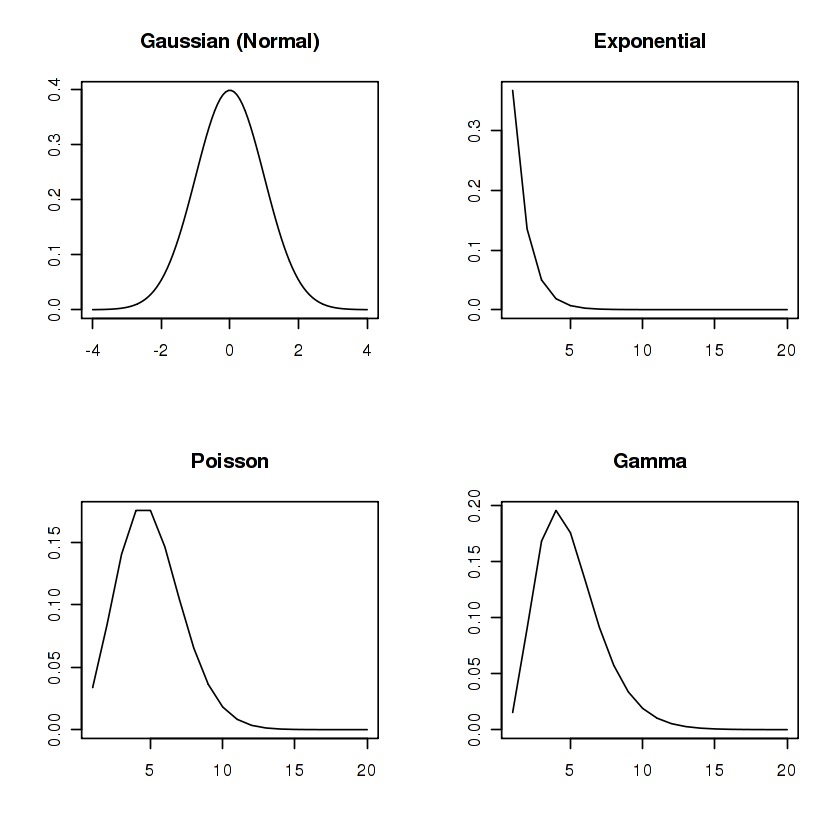

In [2]:
x1 <- seq(-4, 4, length=100)
x2 <- c(1:20)
par(mfrow=c(2, 2))

plot(x1, dnorm(x1, mean=0, sd=1), type="l", 
     xlab="", ylab="", main="Gaussian (Normal)")

plot(x2, dexp(x2), type="l", 
     xlab="", ylab="", main="Exponential")

plot(x2, dpois(x2, lambda=5), type="l", 
     ylab="", xlab="", main="Poisson")

plot(x2, dgamma(x2, shape=5, scale=1), type="l", 
     ylab="", xlab="", main="Gamma")

After taking the log of the loss variable in Part 1, we're left with a target value that is fairly close to normally distributed in a Gaussian distribution. We partly saw this in the last section when we plotted the histogram, but we can also use the Shapiro-Wilk test to verify normality.

In [3]:
# Use Shapiro test to verify normality
shapiro.test(df$TARGET)


	Shapiro-Wilk normality test

data:  df$TARGET
W = 0.97578, p-value = 3.262e-14


## Generalized Linear Model (GLM)
A widely-used model for insurance pricing is the Generalized Linear Model (GLM). As stated in a report[1] by the Casualty Acturial Society: "Actuaries have for many years used GLMs to classify risks, but it is only relatively recently that levels of interest and rates of adoption have increased to the point where it now seems as though they are near-ubiquitous. GLMs are widely used in the personal lines insurance marketplace, especially in operations of meaningful scale."

Before we apply a GLM, let's reinspect our dataset to see what types of variables we're dealing with.

In [4]:
# Reinspect dataset structure
str(df)

'data.frame':	1339 obs. of  7 variables:
 $ ATTORNEY   : int  1 2 2 1 2 1 1 1 2 2 ...
 $ CLMSEX     : int  1 2 1 1 1 2 1 2 2 1 ...
 $ MARITAL    : int  2 2 2 1 4 1 2 2 2 2 ...
 $ CLMINSUR   : int  2 1 2 2 2 2 2 2 2 2 ...
 $ SEATBELT   : int  1 1 1 2 1 1 1 1 1 1 ...
 $ NORM_CLMAGE: num  1.1161 -0.2723 -1.7238 -0.0199 -0.1461 ...
 $ TARGET     : num  3.55 2.39 -1.11 2.4 -1.98 ...


#### What about Categorical values?
We have a combination of continuous and categorical (binary and unordered multinomial) variables in our dataset. Thankfully, the GLM is equipped to deal with both as long as the categorical variables are captured as factors. We could also transform some variables and model the GLM with logistic regression. Let's review the linear regression properties:

#### Linear Regression
- Link: Identity
- Formula: $y = \beta_0 + \Sigma\beta_iX_i + \epsilon$
    - $y$ represents the dependent, target variable
    - $\beta_0$ represents the model intercept
    - $\Sigma\beta_iX_i$ represents the sum of the dependent, predictor variables
    - $\epsilon$ represents the model error term
- Assumptions:
    - Linear relationship between independent and dependent variables
    - All variables have multivariate normality
    - Little to no multicollinearity in the data
    - Little to no autocorrelation in the data
    - Homoskedacity of residuals (equal variance)
    
We verified the first three assumptions in Part 1. After we fit the model, we'll verify the other two assumptions with the Durbin-Watson test and the autocorrelation plot.

In [5]:
# Fit full GLM model and view summary
glm_model <- glm(TARGET ~ factor(ATTORNEY) + factor(CLMSEX) + factor(MARITAL) + factor(CLMINSUR) + 
                 factor(SEATBELT) + NORM_CLMAGE, data=df, family=gaussian())
summary(glm_model)


Call:
glm(formula = TARGET ~ factor(ATTORNEY) + factor(CLMSEX) + factor(MARITAL) + 
    factor(CLMINSUR) + factor(SEATBELT) + NORM_CLMAGE, family = gaussian(), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3271  -0.6855   0.0121   0.7925   4.5496  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.29270    0.12732  10.154  < 2e-16 ***
factor(ATTORNEY)2 -1.40149    0.06900 -20.312  < 2e-16 ***
factor(CLMSEX)2    0.06767    0.06966   0.971  0.33149    
factor(MARITAL)2  -0.17789    0.08013  -2.220  0.02659 *  
factor(MARITAL)3  -0.93986    0.33484  -2.807  0.00508 ** 
factor(MARITAL)4   0.09755    0.21781   0.448  0.65431    
factor(CLMINSUR)2 -0.01458    0.12059  -0.121  0.90378    
factor(SEATBELT)2  1.00343    0.26993   3.717  0.00021 ***
NORM_CLMAGE        0.23538    0.04050   5.812 7.73e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian f

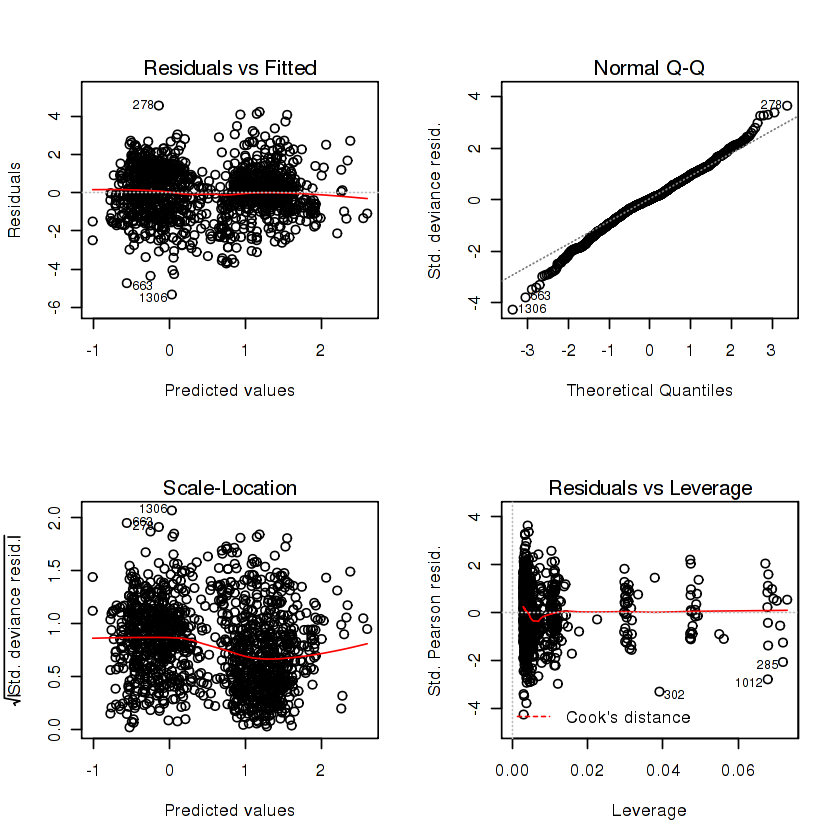

In [6]:
# Plot model residuals to ensure appropriateness of using a linear model
par(mfrow=c(2, 2))
plot(glm_model)

In [7]:
# Print ANOVA table
anova(glm_model)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,1338,2885.748
factor(ATTORNEY),1,666.54798501,1337,2219.200
factor(CLMSEX),1,0.73407326,1336,2218.466
factor(MARITAL),3,58.91285372,1333,2159.553
factor(CLMINSUR),1,0.04959719,1332,2159.503
factor(SEATBELT),1,20.23448463,1331,2139.269
NORM_CLMAGE,1,52.98248138,1330,2086.286


In [8]:
library(MASS)

# Print 95% confidence intervals for model variables
confint(glm_model, level=0.95)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),1.04316481,1.54223187
factor(ATTORNEY)2,-1.53672366,-1.26625452
factor(CLMSEX)2,-0.06885826,0.20420215
factor(MARITAL)2,-0.33494448,-0.02083445
factor(MARITAL)3,-1.59613622,-0.28358613
factor(MARITAL)4,-0.32933847,0.52444251
factor(CLMINSUR)2,-0.25092747,0.22176627
factor(SEATBELT)2,0.47438189,1.53248541
NORM_CLMAGE,0.15599948,0.31475979


In [9]:
suppressMessages(library(lmtest))

# Run Durbin-Watson test to verify homoskedacity
dwtest(glm_model)


	Durbin-Watson test

data:  glm_model
DW = 1.9284, p-value = 0.09528
alternative hypothesis: true autocorrelation is greater than 0


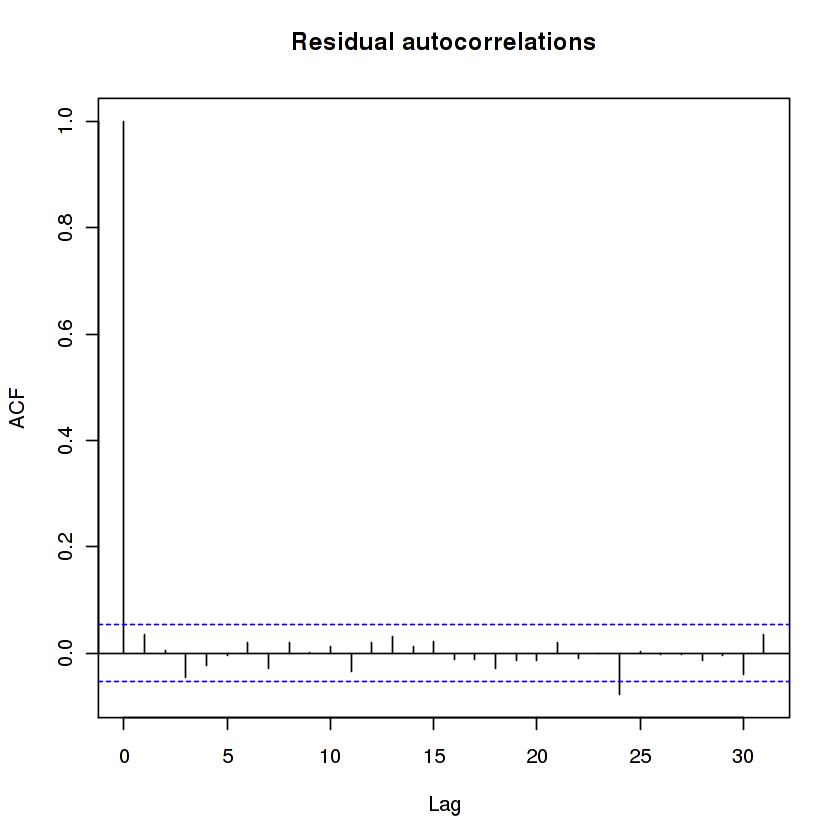

In [10]:
library(ggplot2)

# Plot autocorrelation function to verify no autocorrelation
acf(glm_model$residuals, main="Residual autocorrelations")

In [11]:
# Predict new value to 95% confidence (take exponential to reverse log distribution)
testValue <- data.frame(ATTORNEY=1, CLMSEX=1, MARITAL=2, 
                      CLMINSUR=2, SEATBELT=1, NORM_CLMAGE=-0.2)

pred <- predict(glm_model, testValue, interval='prediction', level=0.95)
cat('Predicted loss: ', exp(pred))

Predicted loss:  2.866674

## Tweedie Distribution
There are many other important distributions in the exponential family (e.g., Bernoulli, Beta, Chi-Squared, Geometric, etc.) The Tweedie model is popular for its ability to fit a mixed Poisson-gamma distribution, which is great for modeling items like claim severity or loss ratio which have a point mass at zero (or a very low positive number) before following a normal exponential curve. Before we took the log distribution, the claim loss variable in our dataset also had this kind of distribution.

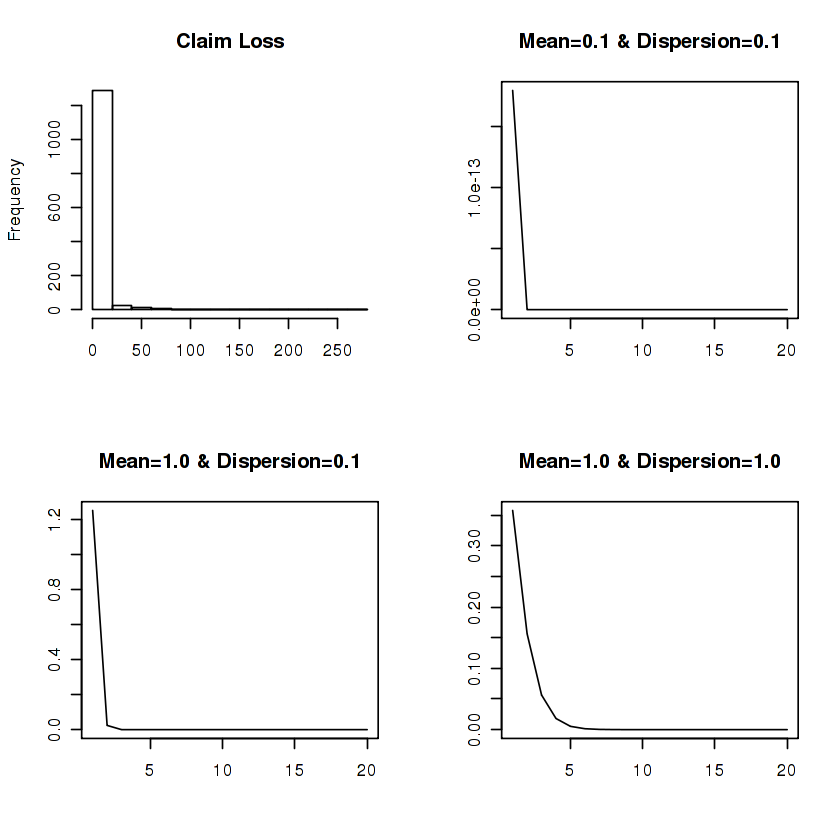

In [12]:
library(statmod)
library(tweedie)

par(mfrow=c(2, 2))
hist(exp(df$TARGET), xlab="", main="Claim Loss")
plot(x2, dtweedie(x2, mu=0.1, phi=0.1, power=1.5), type="l", 
     ylab="", xlab="", main="Mean=0.1 & Dispersion=0.1")
plot(x2, dtweedie(x2, mu=1.0, phi=0.1, power=1.5), type="l", 
     ylab="", xlab="", main="Mean=1.0 & Dispersion=0.1")
plot(x2, dtweedie(x2, mu=1.0, phi=1.0, power=1.5), type="l", 
     ylab="", xlab="", main="Mean=1.0 & Dispersion=1.0")

#### Tweedie Model Parameters
Building a strong Tweedie model is heavily dependent on selecting the right parameter for the variance. The Tweedie package has a profile function that can help by running through different parameter values and returning the best result. For now though, we'll use 2.5 which represents a combination of gamma and inverse Gaussian distributions.

In [13]:
# Fit Tweedie model and view summary
tweedie_model <- glm(exp(TARGET) ~ factor(ATTORNEY) + factor(CLMSEX) + factor(MARITAL) + factor(CLMINSUR) + 
                 factor(SEATBELT) + NORM_CLMAGE, data=df, family=tweedie(var.power=2.5, link.power=0))
summary(tweedie_model)


Call:
glm(formula = exp(TARGET) ~ factor(ATTORNEY) + factor(CLMSEX) + 
    factor(MARITAL) + factor(CLMINSUR) + factor(SEATBELT) + NORM_CLMAGE, 
    family = tweedie(var.power = 2.5, link.power = 0), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.9192  -0.9613  -0.4828   0.0028   5.8255  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.14667    0.22951   9.353  < 2e-16 ***
factor(ATTORNEY)2 -1.42626    0.12318 -11.579  < 2e-16 ***
factor(CLMSEX)2   -0.04644    0.11841  -0.392 0.694975    
factor(MARITAL)2  -0.21491    0.13721  -1.566 0.117530    
factor(MARITAL)3  -0.91605    0.51586  -1.776 0.075997 .  
factor(MARITAL)4  -0.17085    0.38669  -0.442 0.658693    
factor(CLMINSUR)2  0.03436    0.21019   0.163 0.870173    
factor(SEATBELT)2  0.90980    0.61484   1.480 0.139183    
NORM_CLMAGE        0.26304    0.07074   3.718 0.000209 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(

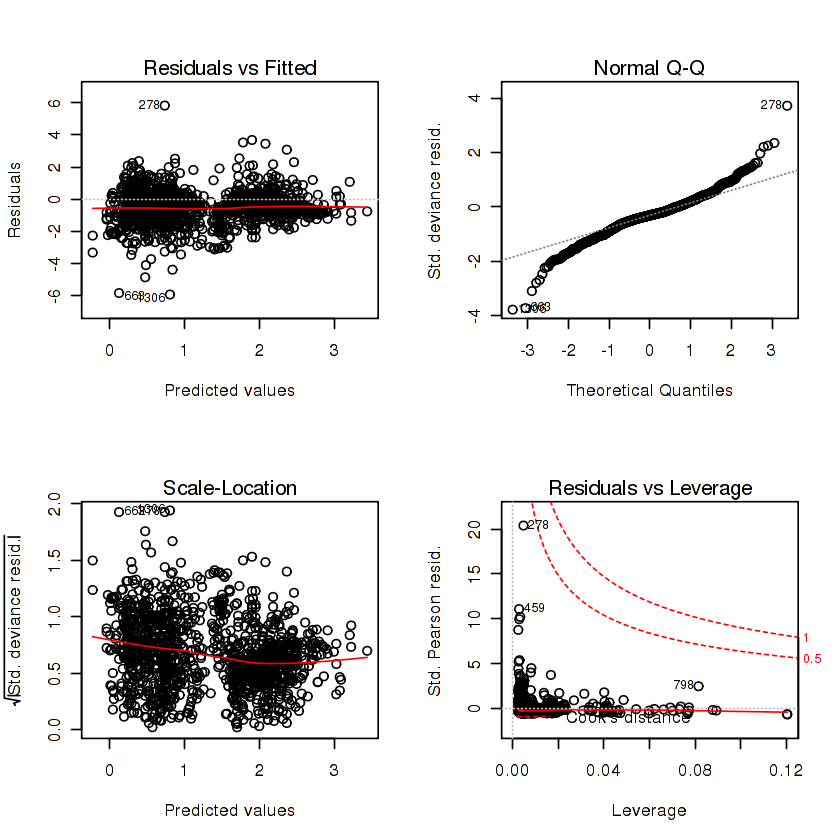

In [14]:
# Plot model residuals to ensure appropriateness of using a linear model
par(mfrow=c(2, 2))
plot(tweedie_model)

In [15]:
# Print ANOVA table
anova(tweedie_model)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,1338,2064.863
factor(ATTORNEY),1,339.75768395,1337,1725.105
factor(CLMSEX),1,0.38995543,1336,1724.715
factor(MARITAL),3,23.77943178,1333,1700.936
factor(CLMINSUR),1,0.02633181,1332,1700.909
factor(SEATBELT),1,9.85248696,1331,1691.057
NORM_CLMAGE,1,21.67358904,1330,1669.383


In [16]:
# Print 95% confidence intervals for model variables
confint(tweedie_model, level=0.95)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),1.71089161,2.67059927
factor(ATTORNEY)2,-1.67750342,-1.18767498
factor(CLMSEX)2,-0.28402125,0.18551254
factor(MARITAL)2,-0.47664355,0.04486246
factor(MARITAL)3,-1.82614819,0.67012386
factor(MARITAL)4,-0.80771858,0.84887649
factor(CLMINSUR)2,-0.43559689,0.40844012
factor(SEATBELT)2,0.01344256,3.20108676
NORM_CLMAGE,0.08607918,0.45170196


In [17]:
# Run Durbin-Watson test to verify homoskedacity
dwtest(glm_model)


	Durbin-Watson test

data:  glm_model
DW = 1.9284, p-value = 0.09528
alternative hypothesis: true autocorrelation is greater than 0


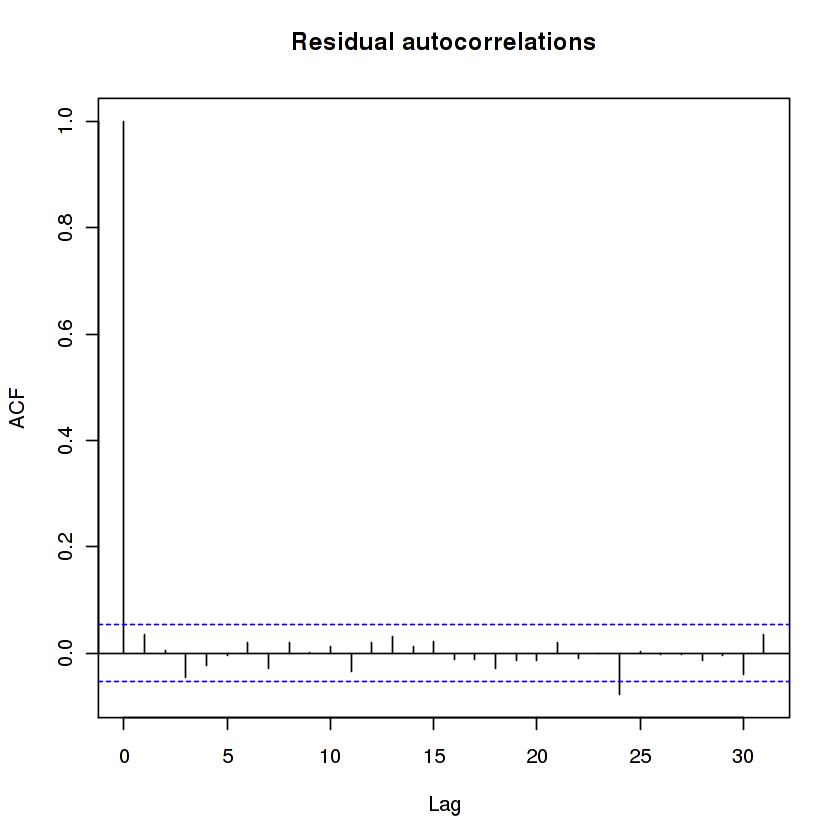

In [18]:
# Plot autocorrelation function to verify no autocorrelation
acf(glm_model$residuals, main="Residual autocorrelations")

In [19]:
# Predict new value to 95% confidence
testValue <- data.frame(ATTORNEY=1, CLMSEX=1, MARITAL=2, 
                      CLMINSUR=2, SEATBELT=1, NORM_CLMAGE=-0.2)

pred <- predict(tweedie_model, testValue, interval='prediction', level=0.95)
cat('Predicted loss: ', pred)

Predicted loss:  1.913517

## Model Comparison
In later sections, we'll look at root mean squared error (RMSE) and lift charts to compare model accuracy. For now, let's highlight the statistical similarities and differences between our GLM and Tweedie models.

The residual and Q-Q plots suggested a linear model was appropriate for the data as the standardized residuals were fairly distributed above and below their difference from the observed values. Similarly, the residuals in the ACF plot suggest that no autocorrelation is present in the data and the Durbin-Watson test statistics are close to 2, suggesting the residuals are homoskedastic.

The coefficients section of the model summary shows us that the claim age, certain marital statuses, and having an attorney representation were statistically significant factors in both models. The ANOVA tables support this finding by showing these factors to have strong deviations from the target variable. Older claims, claimants not wearing a seatbelt, and claimants not having attorney representation have a positive relationship with loss paid. Overall, the Tweedie model returned a lower residual deviance (1669.4) than that of the GLM (2086.3). For further model improvement, we could try feature engineering and feature selection based on stepwise regression techniques.

## Sources
[1] https://www.casact.org/pubs/monographs/papers/05-Goldburd-Khare-Tevet.pdf